In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, Huber
import keras_tuner as kt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
df = pd.read_csv("C:/Users/anand/Documents/Capstone Files Dump/Test case 1/separatemodeltraining/processed_cryptodata.csv")

In [14]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\anand\AppData\Local\Temp\ipykernel_17892\1383876153.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [15]:
df.shape

(7200, 25)

In [16]:
crypto ="Ripple"

In [17]:
# Selecting relevant columns for LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']
target = 'Close'

crypto_df = df[df['Crypto'] == crypto].drop(columns=['Crypto']).dropna()


In [18]:
crypto_df.shape

(707, 24)

In [19]:
crypto_df.isnull().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
VWAP              0
Volume            0
Count             0
Volatility        0
Price_Change      0
RSI               0
MA_7              0
MA_14             0
Close_Lag_1       0
Close_Lag_2       0
Close_Lag_3       0
Rolling_Std_7     0
Rolling_Std_14    0
EMA_7             0
EMA_14            0
MACD              0
Day_of_Week       0
Month             0
Week_of_Year      0
dtype: int64

In [20]:
crypto_df.head()

,Timestamp,Open,High,Low,Close,VWAP,Volume,Count,Volatility,Price_Change,...,Close_Lag_2,Close_Lag_3,Rolling_Std_7,Rolling_Std_14,EMA_7,EMA_14,MACD,Day_of_Week,Month,Week_of_Year
5773,2023-03-08,0.38013,0.40117,0.37248,0.38899,0.38978,1.070000e+07,3699,0.02869,0.00884,...,0.37024,0.36686,0.007204,0.006003,0.378871,0.379400,-0.000529,2,3,10
5774,2023-03-09,0.38893,0.39717,0.36411,0.37122,0.38414,8.709472e+06,3610,0.03306,-0.01777,...,0.38015,0.37024,0.007433,0.005522,0.376959,0.378310,-0.001351,3,3,10
5775,2023-03-10,0.37068,0.37468,0.35744,0.37115,0.36815,6.642818e+06,2358,0.01724,-0.00007,...,0.38899,0.38015,0.007541,0.005723,0.375506,0.377355,-0.001849,4,3,10
5776,2023-03-11,0.37106,0.37718,0.36092,0.36655,0.36678,1.420000e+07,6998,0.01626,-0.00460,...,0.37122,0.38899,0.008143,0.006291,0.373267,0.375914,-0.002647,5,3,10
5777,2023-03-12,0.36694,0.37400,0.35182,0.37393,0.36368,1.110000e+07,4486,0.02218,0.00738,...,0.37115,0.37122,0.007588,0.006274,0.373433,0.375650,-0.002217,6,3,10


In [21]:
cleaned_csv_path = "C:/Users/anand/Documents/Capstone Files Dump//Test case 1/separatemodeltraining/cleaned_ripple_data.csv"
crypto_df.to_csv(cleaned_csv_path, index=False)

# Confirm file saved
print(f"Cleaned dataset saved at: {cleaned_csv_path}")

Cleaned dataset saved at: C:/Users/anand/Documents/Capstone Files Dump//Test case 1/separatemodeltraining/cleaned_ripple_data.csv


In [22]:
df = pd.read_csv("C:/Users/anand/Documents/Capstone Files Dump/Test case 1/separatemodeltraining/cleaned_ripple_data.csv")

In [23]:
df = df.sort_values(by=['Timestamp'])

SARIMAX

In [25]:
import pandas as pd

data_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/separatemodeltraining/cleaned_ripple_data.csv"
df = pd.read_csv(data_path)

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.sort_index(inplace=True)

# Define target variable (Close price)
close_prices = df['Close']

# Define exogenous features
features = ['MACD', 'EMA_7', 'Close_Lag_1']
exog_features = df[features]

# Display first few rows
print(df.head())

               Open     High      Low    Close     VWAP        Volume  Count  \
Timestamp                                                                      
2023-03-08  0.38013  0.40117  0.37248  0.38899  0.38978  1.070000e+07   3699   
2023-03-09  0.38893  0.39717  0.36411  0.37122  0.38414  8.709472e+06   3610   
2023-03-10  0.37068  0.37468  0.35744  0.37115  0.36815  6.642818e+06   2358   
2023-03-11  0.37106  0.37718  0.36092  0.36655  0.36678  1.420000e+07   6998   
2023-03-12  0.36694  0.37400  0.35182  0.37393  0.36368  1.110000e+07   4486   

            Volatility  Price_Change        RSI  ...  Close_Lag_2  \
Timestamp                                        ...                
2023-03-08     0.02869       0.00884  50.567508  ...      0.37024   
2023-03-09     0.03306      -0.01777  38.867188  ...      0.38015   
2023-03-10     0.01724      -0.00007  44.618834  ...      0.38899   
2023-03-11     0.01626      -0.00460  42.036333  ...      0.37122   
2023-03-12     0.02218   

In [26]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test on Close Price
adf_test = adfuller(close_prices)

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

if adf_test[1] < 0.05:
    print("✅ Data is stationary, ARIMA can be applied directly (d=0).")
else:
    print("⚠️ Data is non-stationary, differencing is required (d>0).")

ADF Statistic: 0.3810846080166573
p-value: 0.9807736260077949
⚠️ Data is non-stationary, differencing is required (d>0).


In [27]:
# Apply first-order differencing if needed
diff_close_prices = close_prices.diff().dropna()

# Perform ADF test again
adf_test_diff = adfuller(diff_close_prices)

print(f"After Differencing - ADF Statistic: {adf_test_diff[0]}")
print(f"After Differencing - p-value: {adf_test_diff[1]}")

if adf_test_diff[1] < 0.05:
    print("✅ Data is now stationary, ARIMA can be applied with d=1.")
else:
    print("⚠️ Still non-stationary, consider d=2.")

After Differencing - ADF Statistic: -6.1645831503522395
After Differencing - p-value: 7.040230538613259e-08
✅ Data is now stationary, ARIMA can be applied with d=1.


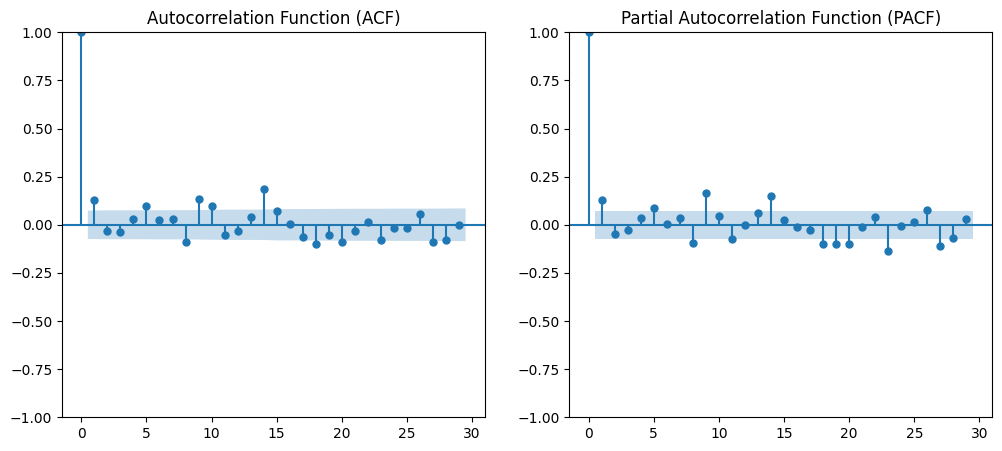

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot (for q)
plot_acf(diff_close_prices, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF Plot (for p)
plot_pacf(diff_close_prices, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

In [29]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Define possible values for p, d, q, P, D, Q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
s = [7]  # Weekly seasonality

best_mae = float("inf")
best_params = None
best_model = None

# Grid search over all combinations
for param in itertools.product(p, d, q, P, D, Q, s):
    try:
        model = SARIMAX(close_prices, exog=exog_features, order=param[:3], seasonal_order=param[3:])
        result = model.fit(disp=False)
        
        # Forecast for last 30 days
        forecast = result.forecast(steps=30, exog=exog_features.iloc[-30:])
        
        # Compute MAE
        mae = mean_absolute_error(close_prices[-30:], forecast)
        
        if mae < best_mae:
            best_mae = mae
            best_params = param
            best_model = result
    
    except:
        continue

print(f"✅ Best SARIMAX Parameters: {best_params} with MAE: {best_mae}")

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\s

✅ Best SARIMAX Parameters: (0, 0, 0, 0, 1, 1, 7) with MAE: 0.09495727980330829


c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the final optimized SARIMAX model
sarimax_final = SARIMAX(close_prices, exog=exog_features,
                        order=(0, 0, 0), seasonal_order=(0, 1, 1, 7))
sarimax_result_final = sarimax_final.fit()

# Print summary of the final model
print(sarimax_result_final.summary())

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:                     Close   No. Observations:                  707
Model:             SARIMAX(0, 1, [1], 7)   Log Likelihood                1142.646
Date:                   Mon, 07 Apr 2025   AIC                          -2275.291
Time:                           13:13:11   BIC                          -2252.536
Sample:                       03-08-2023   HQIC                         -2266.495
                            - 02-11-2025                                         
Covariance Type:                     opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MACD            0.8917      0.025     35.722      0.000       0.843       0.941
EMA_7           0.7470      0.023     32.186      0.000       0.702       0.793
Close_Lag_1     0.2334  

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Forecast next 30 days
sarimax_forecast = sarimax_result_final.forecast(steps=30, exog=exog_features.iloc[-30:])

# Compute Performance Metrics
mae_sarimax = mean_absolute_error(close_prices[-30:], sarimax_forecast)
mse_sarimax = mean_squared_error(close_prices[-30:], sarimax_forecast)
rmse_sarimax = np.sqrt(mse_sarimax)
r2_sarimax = r2_score(close_prices[-30:], sarimax_forecast)

sarimax_performance = {
    "MAE": mae_sarimax,
    "MSE": mse_sarimax,
    "RMSE": rmse_sarimax,
    "R-squared": r2_sarimax
}

print("Final SARIMAX Performance Metrics:", sarimax_performance)


Final SARIMAX Performance Metrics: {'MAE': np.float64(0.09495727980330829), 'MSE': np.float64(0.01634014632425778), 'RMSE': np.float64(0.12782858179709958), 'R-squared': 0.8429382376039287}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


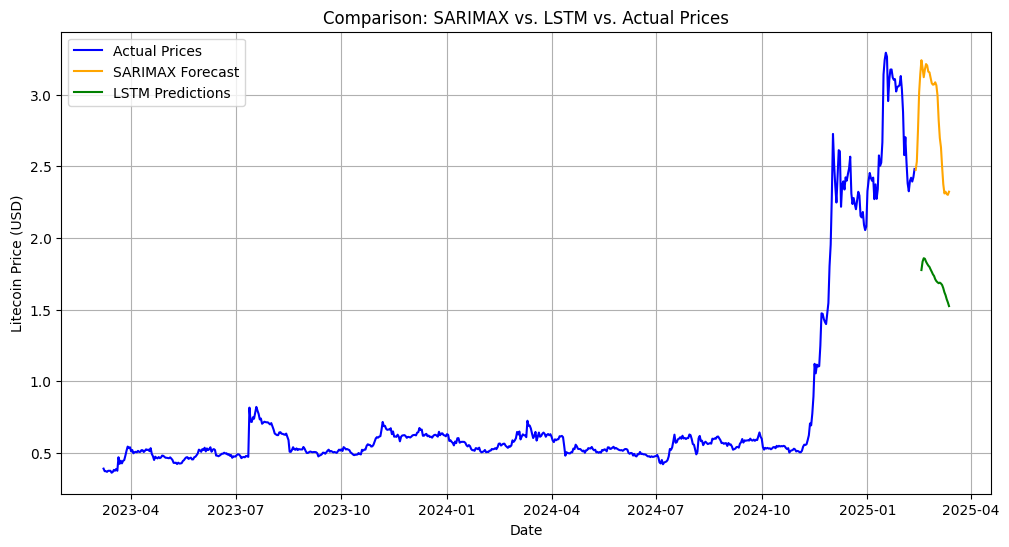

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load trained LSTM model
lstm_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/models/LSTM_Ripple.h5"
lstm_model = load_model(lstm_model_path)

# Normalize data before feeding into LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Prepare test data for LSTM
look_back = 5
test_scaled = scaled_data[-30:]  # Last 30 days for testing
X_test = []
for i in range(look_back, len(test_scaled)):
    X_test.append(test_scaled[i - look_back:i, :])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], look_back, len(features)))

# LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(
    np.concatenate([np.zeros((lstm_predictions.shape[0], len(features)-1)), lstm_predictions], axis=1)
)[:, -1]  # Extract only Close Price

# Generate future dates for plotting (30 days ahead)
final_future_dates = pd.date_range(start=close_prices.index[-1], periods=30 + 1, freq='D')[1:]

# Adjust test index for LSTM predictions (aligned with available test data)
lstm_test_index = final_future_dates[look_back:]

# Plot SARIMAX vs. LSTM vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, close_prices, label="Actual Prices", color='blue')
plt.plot(final_future_dates, sarimax_forecast, label="SARIMAX Forecast", color='orange')
plt.plot(lstm_test_index, lstm_predictions, label="LSTM Predictions", color='green')

plt.xlabel('Date')
plt.ylabel('Litecoin Price (USD)')
plt.title("Comparison: SARIMAX vs. LSTM vs. Actual Prices")
plt.legend()
plt.grid()
plt.show()

In [33]:
# Save the trained SARIMAX model
sarimax_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/SARIMAX_model/SARIMAX_Ripple.pkl"
sarimax_result_final.save(sarimax_model_path)

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


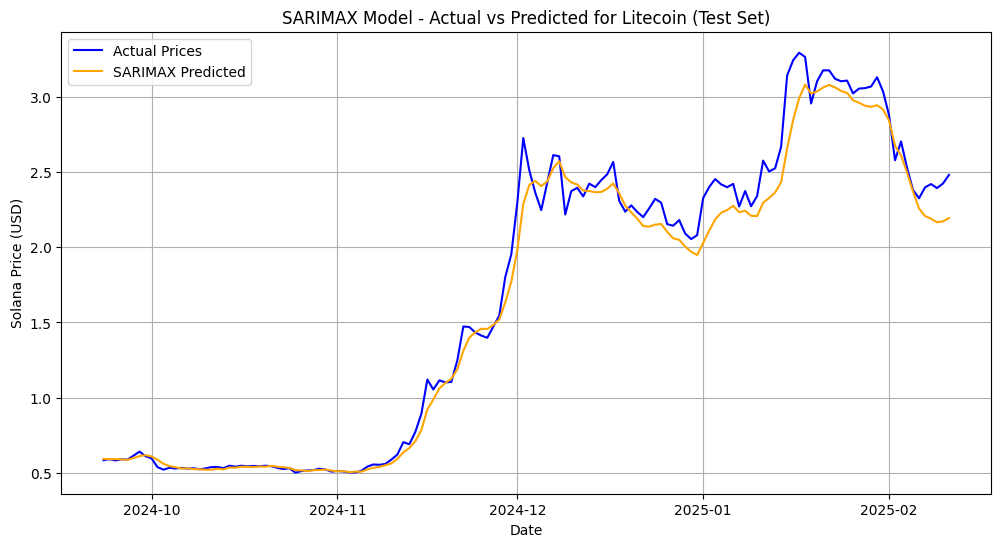

{'MAE': np.float64(0.0831765180882207),
 'MSE': np.float64(0.016098207946743617),
 'RMSE': np.float64(0.12687871352888008),
 'R² Score': 0.9830670818229916}

In [34]:
# Split data into 80% train and 20% test sets
train_size = int(len(close_prices) * 0.8)
train_y, test_y = close_prices[:train_size], close_prices[train_size:]
train_exog, test_exog = exog_features[:train_size], exog_features[train_size:]

# Train SARIMAX using best-found parameters
sarimax_model = SARIMAX(train_y, exog=train_exog, order=(0, 0, 0), seasonal_order=(0, 1, 1, 7))
sarimax_result = sarimax_model.fit(disp=False)

# Predict for the test set
sarimax_pred = sarimax_result.predict(start=len(train_y), end=len(close_prices)-1, exog=test_exog)

# Compute Performance Metrics for SARIMAX
mae_sarimax = mean_absolute_error(test_y, sarimax_pred)
mse_sarimax = mean_squared_error(test_y, sarimax_pred)
rmse_sarimax = np.sqrt(mse_sarimax)
r2_sarimax = r2_score(test_y, sarimax_pred)

sarimax_performance = {
    "MAE": mae_sarimax,
    "MSE": mse_sarimax,
    "RMSE": rmse_sarimax,
    "R² Score": r2_sarimax
}

# Plot SARIMAX predictions vs Actual values
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label="Actual Prices", color='blue')
plt.plot(test_y.index, sarimax_pred, label="SARIMAX Predicted", color='orange')

plt.xlabel('Date')
plt.ylabel('Solana Price (USD)')
plt.title("SARIMAX Model - Actual vs Predicted for Litecoin (Test Set)")
plt.legend()
plt.grid()
plt.show()

# Display SARIMAX performance
sarimax_performance

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


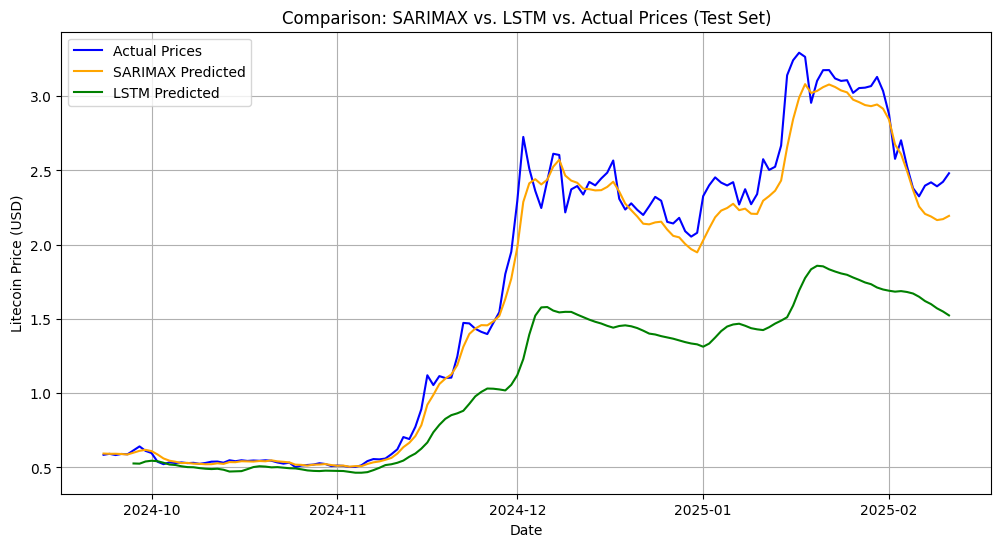

In [35]:
# Load the trained LSTM model
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Define path to LSTM model
lstm_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/models/LSTM_Ripple.h5"

# Load the model
lstm_model = load_model(lstm_model_path)

# Normalize data before feeding into LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Prepare test data for LSTM
look_back = 5
test_scaled = scaled_data[-len(test_y):]  # Use test data for LSTM
X_test = []
for i in range(look_back, len(test_scaled)):
    X_test.append(test_scaled[i - look_back:i, :])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], look_back, len(features)))

# Generate LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(
    np.concatenate([np.zeros((lstm_predictions.shape[0], len(features) - 1)), lstm_predictions], axis=1)
)[:, -1]  # Extract only Close Price

# Adjust test index for LSTM predictions (aligned with available test data)
lstm_test_index = test_y.index[look_back:]

# Plot SARIMAX vs. LSTM vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label="Actual Prices", color='blue')
plt.plot(test_y.index, sarimax_pred, label="SARIMAX Predicted", color='orange')
plt.plot(lstm_test_index, lstm_predictions, label="LSTM Predicted", color='green')

plt.xlabel('Date')
plt.ylabel('Litecoin Price (USD)')
plt.title("Comparison: SARIMAX vs. LSTM vs. Actual Prices (Test Set)")
plt.legend()
plt.grid()
plt.show()